# Amazon Fine Food Reviews

Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews

The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.

Number of reviews: 568,454
Number of users: 256,059
Number of products: 74,258
Timespan: Oct 1999 - Oct 2012
Number of Attributes/Columns in data: 10

Attribute Information:

    Id
    ProductId - unique identifier for the product
    UserId - unqiue identifier for the user
    ProfileName
    HelpfulnessNumerator - number of users who found the review helpful
    HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
    Score - rating between 1 and 5
    Time - timestamp for the review
    Summary - brief summary of the review
    Text - text of the review


# Importing libraries and loading the dataset :

In [1]:
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc,confusion_matrix,classification_report,accuracy_score
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn import datasets, neighbors
%matplotlib inline
from bs4 import BeautifulSoup
import itertools
from nltk.tokenize import word_tokenize
from nltk.tokenize import wordpunct_tokenize
# from nltk.tokenize import sent_tokenize (Tokenization)
from nltk.probability import FreqDist
from nltk.metrics import ConfusionMatrix
from wordcloud import WordCloud
import nltk
# nltk.download('wordnet')
from bs4 import BeautifulSoup
from tqdm import tqdm
import emoji
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
from nltk.tokenize import wordpunct_tokenize


In [2]:
#Read the file
data=pd.read_csv("C:\\Users\\Subramanyam\\Desktop\\ML DATASETS\\amazon-fine-food-reviews\\Reviews.csv")

# Exploratory_Data_Analysis

In [3]:
# first five rows of the data
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
# shape of the dataa
data.shape

(568454, 10)

In [5]:
# type of the data
data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [6]:
# description of the data
data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [7]:
# information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568427 non-null object
Text                      568454 non-null object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [8]:
# drop the dummy variables
#Sorting data according to ProductId in ascending order
sorted_data=data.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

#Deduplication of entries
final_data=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final_data.shape

(393933, 10)

In [9]:
# check missing values
final_data.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               11
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                    3
Text                       0
dtype: int64

In [10]:
# drop the missing values
final_data = final_data.dropna()

Observation:- It was also seen that in two rows given below the value of HelpfulnessNumerator is greater than HelpfulnessDenominator which is not practically possible hence these two rows too are removed from calcualtions

In [11]:
final_data=final_data[final_data.HelpfulnessNumerator<=final_data.HelpfulnessDenominator]

In [12]:
#Checking to see how much % of data still remains
print("Checking to see how much % of data still remains",(final_data['Id'].size*1.0)/(data['Id'].size*1.0)*100)

Checking to see how much % of data still remains 69.29619635010044


In [13]:
# rating 3 making conflict,when we are going sentiment for tge product reviews,so remove 3 rating data
final_data = final_data[final_data.Score != 3]
final_data = final_data[final_data.Score != 4]
final_data = final_data[final_data.Score != 2]

In [14]:
#Checking to see how much % of data still remains after removing score 3
print("Checking to see how much % of data still remains",(final_data['Id'].size*1.0)/(data['Id'].size*1.0)*100)

Checking to see how much % of data still remains 50.53408015424291


In [15]:
final_data.Score.value_counts()

5    250959
1     36304
Name: Score, dtype: int64

In [16]:
final_data['Sentiment'] = final_data['Score'].map({1: 0,5: 1})

In [17]:
final_data.Sentiment.value_counts()

1    250959
0     36304
Name: Sentiment, dtype: int64

In [18]:
final_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
150502,150503,0006641040,A3R5XMPFU8YZ4D,"Her Royal Motherliness ""Nana""",1,1,5,1233964800,so fun to read,This is my grand daughter's and my favorite bo...,1
150500,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,5,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,1
150498,150499,0006641040,A3E7R866M94L0C,"L. Barker ""simienwolf""",2,2,5,1065830400,Can't explain why,This book has been a favorite of mine since I ...,1
150497,150498,0006641040,A3SJWISOCP31TR,R. J. Wells,2,2,5,1176336000,A Gem of a Book,This is a wonderful little book. I loved it 40...,1
150496,150497,0006641040,A1HKYQOFC8ZZCH,"Maria Apolloni ""lanarossa""",2,2,1,1334707200,"The story is great, the softcover book is disa...",I give five stars to the Maurice Sendak story....,0


In [19]:
# it will take so much time for model to train on large data,so i'm taking less data

In [20]:
neg_data = final_data[final_data['Sentiment'] == 0][0:25000]
pos_data = final_data[final_data['Sentiment'] == 1][0:25000]
sample_data = pd.concat([neg_data, pos_data])
sample_data['Sentiment'].value_counts()

1    25000
0    25000
Name: Sentiment, dtype: int64

In [21]:
neg_data = neg_data['Text']
pos_data = pos_data['Text']

In [22]:
sample_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
150496,150497,0006641040,A1HKYQOFC8ZZCH,"Maria Apolloni ""lanarossa""",2,2,1,1334707200,"The story is great, the softcover book is disa...",I give five stars to the Maurice Sendak story....,0
150525,150526,0006641040,A3E9QZFE9KXH8J,R. Mitchell,11,18,1,1129507200,awesome book poor size,This is one of the best children's books ever ...,0
171179,171180,7310172001,A2WDF9UM0M1VAD,susan m. kaitz,3,6,1,1317859200,Review of Freeze Dried Liver Treats For Dogs,I received all containers previously opened - ...,0
171182,171183,7310172001,AE9ZBY7WW3LIQ,W. K. Ota,5,13,1,1219363200,Why sbould I get crums?,I selected this company over the other even th...,0
76889,76890,B00002N8SM,A110QUC2ULFN7R,swatter,0,2,1,1186704000,This does not work...,After a summer grill party where the door was ...,0


In [23]:
sample_data = sample_data[["Text","Sentiment"]]

In [24]:
# shuffle the data

In [25]:
# import random
# random.shuffle(sample_data)
from sklearn.utils import shuffle
sample_data = shuffle(sample_data)

In [26]:
sample_data.head()

,Text,Sentiment
105692,Was hoping this would taste good but I would o...,0
86252,This has to be one of the most disappointing d...,0
197758,When my toddler ate this cereal (about 5 times...,0
481427,Let me just say that I am so impressed with th...,1
318493,I use this in all my Guatemalan recipes that r...,1


In [27]:
# we can plot a word cloud
# and occurence of a word in a corpus using bag of words
# on behalf we are going for count function

In [28]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

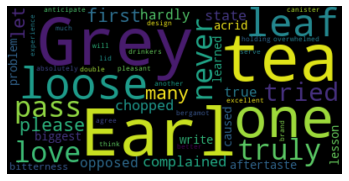

In [29]:
# Start with one review:
text = sample_data.Text[79852]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [30]:
# word cloud for corpus of different classes

In [31]:
def _tokenize_text(data):
    ls = []

    for line in data:
        tokens = wordpunct_tokenize(line)
        ls.append(tokens)

    return ls

In [32]:
neg_data_tokens = _tokenize_text(neg_data)
pos_data_tokens = _tokenize_text(pos_data)

In [33]:
# check data
for i in range(0, 5):
    print(neg_data_tokens[i])

['I', 'give', 'five', 'stars', 'to', 'the', 'Maurice', 'Sendak', 'story', '.', 'One', 'star', 'for', 'this', 'printed', 'edition', 'of', 'the', 'book', '.<', 'br', '/>', 'My', 'children', 'had', 'an', 'older', 'copy', 'this', 'book', ',', 'so', 'I', 'was', 'very', 'familiar', 'with', 'the', 'previous', 'softcover', 'version', '.', 'I', 'ordered', 'this', 'for', 'my', 'granddaughters', ',', 'but', 'I', "'", 'm', 'embarrassed', 'to', 'give', 'it', 'as', 'a', 'gift', ',', 'it', 'looks', 'so', 'puny', '.', 'The', 'book', 'is', 'about', 'the', 'size', 'of', 'a', 'postcard', 'and', 'I', 'think', 'it', "'", 's', 'overpriced', '.', 'I', "'", 've', 'learned', 'my', 'lesson', ':', 'I', 'will', 'not', 'be', 'buying', 'any', 'more', 'softcover', 'children', 'books', ',', 'next', 'time', 'I', "'", 'll', 'get', 'a', 'used', 'copy', '.']
['This', 'is', 'one', 'of', 'the', 'best', 'children', "'", 's', 'books', 'ever', 'written', 'but', 'it', 'is', 'a', 'mini', 'version', 'of', 'the', 'book', 'and', '

In [34]:
def _get_text_cloud(tokens):
    text = ''

    for tk_line in tokens:
        new_tokens = []
        
        for word in tk_line:
            text += word + ' '
        
    return text

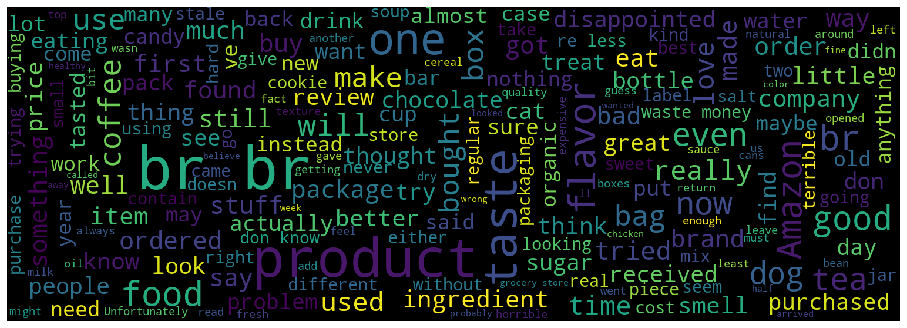

In [35]:
# print negative WordCloud
import random
sample_neg_data = random.sample(neg_data_tokens, 10000)
text_cloud = _get_text_cloud(sample_neg_data)

word_cloud = WordCloud(max_font_size = 100, width = 1520, height = 535)
word_cloud.generate(text_cloud)
plt.figure(figsize = (16, 9))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

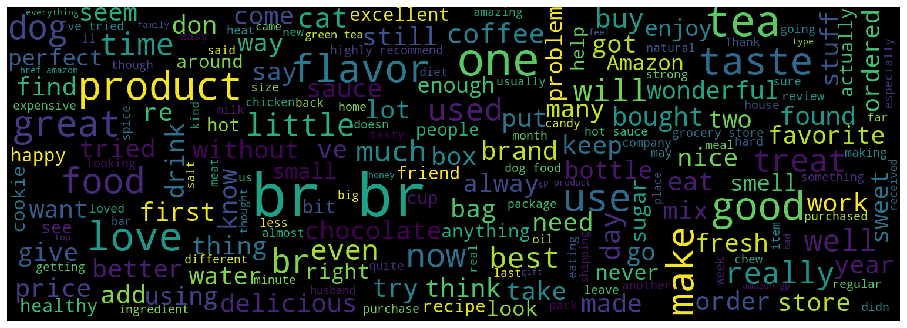

In [36]:
# print positive WordCloud
sample_pos_data   = random.sample(pos_data_tokens,10000)
text_cloud = _get_text_cloud(sample_pos_data)

word_cloud = WordCloud(max_font_size = 100, width = 1520, height = 535)
word_cloud.generate(text_cloud)
plt.figure(figsize = (16, 9))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [37]:
# from above word clouds of different classes i.e pos and negative we can see which are more frequent

In [38]:
# it is important to do after preprocessing, there you will get good reults

In [39]:
from collections import  Counter
cnt = Counter()
for text in sample_data["Text"].values:
    for word in text.split():
        cnt[word] += 1

In [40]:
cnt.most_common(100)

[('the', 146577),
 ('I', 122794),
 ('and', 105227),
 ('a', 92035),
 ('to', 88214),
 ('of', 67644),
 ('is', 57639),
 ('it', 56182),
 ('this', 46831),
 ('in', 46023),
 ('for', 42776),
 ('that', 34973),
 ('was', 33408),
 ('my', 30622),
 ('have', 28825),
 ('with', 27948),
 ('not', 27561),
 ('but', 24890),
 ('on', 23421),
 ('you', 23261),
 ('are', 22327),
 ('/><br', 21942),
 ('as', 20015),
 ('they', 18707),
 ('like', 17811),
 ('The', 16718),
 ('be', 16514),
 ('so', 16254),
 ('from', 15031),
 ('at', 14792),
 ('or', 13685),
 ('had', 13385),
 ('just', 12674),
 ('It', 12340),
 ('This', 12332),
 ('them', 11943),
 ('one', 11852),
 ('very', 11763),
 ('these', 11745),
 ('has', 11120),
 ('product', 11094),
 ('will', 10703),
 ('all', 10633),
 ('would', 10618),
 ('can', 10548),
 ('taste', 9685),
 ('when', 9212),
 ('if', 8991),
 ('were', 8938),
 ('out', 8820),
 ('good', 8646),
 ('get', 8591),
 ('about', 8589),
 ('your', 8453),
 ('other', 8371),
 ('no', 8339),
 ('more', 8190),
 ('me', 7948),
 ('tea', 79

# Text_Preprocessing

removing html tags using beautifulsoup

removing the url,and word starts with www,http

removing thje words start with @ and #

replacing emoticons

replacing emojis

replacing ASAP ype words with As soon as possible

removing special characters

removing digits

removing stopwords

lowering the words

lemmatisation

In [41]:
import nltk

from nltk.corpus import stopwords
# nltk.download()
stopwords_list = set(stopwords.words('english'))
print(stopwords_list)
print(len(stopwords_list))

{'you', "mightn't", "you'll", 'under', 'there', 'him', 'has', 'after', 'over', 'then', 'them', "haven't", "shan't", 'only', 'here', "you'd", 'can', 'itself', 'that', 'between', 'doesn', 'into', 'whom', 'not', 'most', 've', 'yourselves', 'our', 'few', 'ourselves', 'needn', 'before', 'an', 'will', 'some', 'own', 'y', 'having', "hasn't", 'yourself', 'do', 'of', 'am', 'aren', 'd', 'shouldn', "she's", 'such', "couldn't", 'wouldn', "needn't", 'from', "wouldn't", 'just', 'are', 'the', 'all', 'her', 'been', 'if', 'hasn', 'herself', 'no', 'until', 'because', 'his', "hadn't", 'they', 'it', 'had', 'was', 'ain', "aren't", 'its', 'didn', 'in', "didn't", 'when', "don't", 'wasn', 'being', 'other', 'down', 'shan', 'on', 'm', 'is', 'hers', 'this', 'should', 'were', 'but', 'nor', 'he', 'haven', 'those', 'off', 'as', 'how', 'my', 'more', "shouldn't", 'don', 'hadn', 't', "you're", 'we', 'theirs', 'same', 'where', 'ours', "should've", 'or', 'which', 'for', 'too', 'about', 'what', 'have', "it's", 'so', 'whi

In [42]:
# omit some stopwords from the stopwords
newstopwords_list = set(stopwords.words('english'))- set(['no',"hadn't", "aren't","hasn't","doesn't","mustn't", "wasn't","didn't", "haven't","don't","shouldn't","isn't", "mightn't", "wouldn't", "shan't", "weren't"])
print(len(newstopwords_list))

163


In [43]:
# omit some stopwords from the stopwords
import nltk

from nltk.corpus import stopwords
# nltk.download()
stopwords_list = set(stopwords.words('english'))
newstopwords_list = set(stopwords.words('english'))- set(['no',"hadn't", "aren't","hasn't","doesn't","mustn't", "wasn't","didn't", "haven't","don't","shouldn't","isn't", "mightn't", "wouldn't", "shan't", "weren't"])

# add some stopwords to the stopwords
newStopWords = ['the','i','and','a','to','of','it','is','for','in','these','that','was','have','with','but','br','just','ingredients','water','food','food','item','product','dog','test','dogs']
Newstopwords_list = newstopwords_list.union(newStopWords)
print(len(Newstopwords_list))
print(Newstopwords_list)

172
{'you', "you'll", 'under', 'there', 'him', 'has', 'after', 'over', 'then', 'them', 'only', 'here', "you'd", 'can', 'itself', 'that', 'between', 'doesn', 'into', 'whom', 'not', 'most', 've', 'yourselves', 'ingredients', 'our', 'few', 'ourselves', 'needn', 'before', 'food', 'an', 'will', 'some', 'own', 'y', 'having', 'yourself', 'do', 'of', 'am', 'aren', 'd', 'shouldn', "she's", 'such', "couldn't", 'wouldn', "needn't", 'dogs', 'from', 'just', 'are', 'the', 'all', 'her', 'been', 'if', 'hasn', 'herself', 'until', 'because', 'his', 'they', 'it', 'had', 'was', 'ain', 'its', 'didn', 'in', 'when', 'wasn', 'being', 'other', 'down', 'shan', 'on', 'm', 'is', 'hers', 'this', 'should', 'were', 'but', 'nor', 'he', 'haven', 'those', 'off', 'as', 'how', 'my', 'more', 'don', 'hadn', 't', "you're", 'we', 'theirs', 'same', 'where', 'ours', "should've", 'or', 'which', 'for', 'too', 'about', 'what', 'have', "it's", 'so', 'while', 'br', 'ma', 'isn', 'water', 'out', 'above', 'won', 'she', 'why', 'through

In [44]:
# https://stackoverflow.com/a/47091490/4084039
import re
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [45]:
def load_dict_CONTRACTIONS():
    return{
        "AFAIK":"As Far As I Know",
        "AFK": "Away From Keyboard",
        "ASAP":"As Soon As Possible",
        "ATK":"At The Keyboard",
        "ATM":"At The Moment",
        "A3A":"Anytime, Anywhere, Anyplace",
        "BAK":"Back At Keyboard",
        "BBL":"Be Back Later",
        "BBS":"Be Back Soon",
        "BFN":"Bye For Now",
        "B4N":"Bye For Now",
        "BRB":"Be Right Back",
        "BRT":"Be Right There",
        "BTW":"By The Way",
        "B4":"Before",
        "B4N":"Bye For Now",
        "CU":"See You",
        "CUL8R":"See You Later",
        "CYA":"See You",
        "FAQ":"Frequently Asked Questions",
        "FC":"Fingers Crossed",
        "FWIW":"For What It's Worth",
        "FYI":"For Your Information",
        "GAL":"Get A Life",
        "GG":"Good Game",
        "GN":"Good Night",
        "GMTA":"Great Minds Think Alike",
        "GR8":"Great!",
        "G9":"Genius",
        "IC":"I See",
        "ICQ":"I Seek you (also a chat program)",
        "ILU":"ILU: I Love You",
        "IMHO":"In My Honest/Humble Opinion",
        "IMO":"In My Opinion",
        "IOW":"In Other Words",
        "IRL":"In Real Life",
        "KISS":"Keep It Simple, Stupid",
        "LDR":"Long Distance Relationship",
        "LMAO":"Laugh My A.. Off",
        "LOL":"Laughing Out Loud",
        "LTNS":"Long Time No See",
        "L8R":"Later",
        "MTE":"My Thoughts Exactly",
        "M8":"Mate",
        "NRN":"No Reply Necessary",
        "OIC":"Oh I See",
        "PITA":"Pain In The A..",
        "PRT":"Party",
        "PRW":"Parents Are Watching",
        "QPSA?":"Que Pasa?",
        "ROFL":"Rolling On The Floor Laughing",
        "ROFLOL":"Rolling On The Floor Laughing Out Loud",
        "ROTFLMAO":"Rolling On The Floor Laughing My A.. Off",
        "SK8":"Skate",
        "STATS":"Your sex and age",
        "ASL":"Age, Sex, Location",
        "THX":"Thank You",
        "TTFN":"Ta-Ta For Now!",
        "TTYL":"Talk To You Later",
        "U":"You",
        "U2":"You Too",
        "U4E":"Yours For Ever",
        "WB":"Welcome Back",
        "WTF":"What The F...",
        "WTG":"Way To Go!",
        "WUF":"Where Are You From?",
        "W8":"Wait...AFAIK=As Far As I Know",
        "7K":"Sick",
        "-D ":"Laugher"
    }

In [46]:
def converting_full(x, dic):
    for word in dic.keys():
        x = x.replace(word, dic[word])
    return x

In [47]:
def correct_spelling(x, dic):
    for word in dic.keys():
        x = x.replace(word, dic[word])
    return x

In [48]:
def load_dict_EMOTICONS(): 
    return{
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated",
    ":)":"positive_emoticon",
    ":))":"positive_emoticon",
    ":)))":"positive_emoticon",
    ":))))":"positive_emoticon",
    ":)))))":"positive_emoticon",
    ":(":"negative_emoticon",
    ":((":"negative_emoticon",
    ":(((":"negative_emoticon",
    ":((((":"negative_emoticon",
    ":(((((":"negative_emoticon"
}


In [49]:
def load_dict_EMOTICONS_EMO():
    return{
    u":‑)":"Happy face or smiley",
    u":)":"Happy face or smiley",
    u":-]":"Happy face or smiley",
    u":]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-)":"Happy face smiley",
    u":o)":"Happy face smiley",
    u":-}":"Happy face smiley",
    u":}":"Happy face smiley",
    u":-)":"Happy face smiley",
    u":c)":"Happy face smiley",
    u":^)":"Happy face smiley",
    u"=]":"Happy face smiley",
    u"=)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B^D":"Laughing, big grin or laugh with glasses",
    u":-))":"Very happy",
    u":-(":"Frown, sad, andry or pouting",
    u":‑(":"Frown, sad, andry or pouting",
    u":(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑[":"Frown, sad, andry or pouting",
    u":[":"Frown, sad, andry or pouting",
    u":-||":"Frown, sad, andry or pouting",
    u">:[":"Frown, sad, andry or pouting",
    u":{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:(":"Frown, sad, andry or pouting",
    u":'‑(":"Crying",
    u":'(":"Crying",
    u":'‑)":"Tears of happiness",
    u":')":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-*":"Kiss",
    u":*":"Kiss",
    u":X":"Kiss",
    u";‑)":"Wink or smirk",
    u";)":"Wink or smirk",
    u"*-)":"Wink or smirk",
    u"*)":"Wink or smirk",
    u";‑]":"Wink or smirk",
    u";]":"Wink or smirk",
    u";^)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑|":"Straight face",
    u":|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑)":"Angel, saint or innocent",
    u"O:)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑)":"Angel, saint or innocent",
    u"0:)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;^)":"Angel, saint or innocent",
    u">:‑)":"Evil or devilish",
    u">:)":"Evil or devilish",
    u"}:‑)":"Evil or devilish",
    u"}:)":"Evil or devilish",
    u"3:‑)":"Evil or devilish",
    u"3:)":"Evil or devilish",
    u">;)":"Evil or devilish",
    u"|;‑)":"Cool",
    u"|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑)":"Party all night",
    u"%‑)":"Drunk or confused",
    u"%)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑|":"Dump",
    u"(>_<)":"Troubled",
    u"(>_<)>":"Troubled",
    u"(';')":"Baby",
    u"(^^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"(^_^;)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"(-_-;)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"(~_~;) (・.・;)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"(-_-)zzz":"Sleeping",
    u"(^_-)":"Wink",
    u"((+_+))":"Confused",
    u"(+o+)":"Confused",
    u"(o|o)":"Ultraman",
    u"^_^":"Joyful",
    u"(^_^)/":"Joyful",
    u"(^O^)／":"Joyful",
    u"(^o^)／":"Joyful",
    u"(__)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_(._.)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<(_ _)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m(__)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m(__)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m(_ _)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"('_')":"Sad or Crying",
    u"(/_;)":"Sad or Crying",
    u"(T_T) (;_;)":"Sad or Crying",
    u"(;_;":"Sad of Crying",
    u"(;_:)":"Sad or Crying",
    u"(;O;)":"Sad or Crying",
    u"(:_;)":"Sad or Crying",
    u"(ToT)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q.Q":"Sad or Crying",
    u"T.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"(-.-)":"Shame",
    u"(-_-)":"Shame",
    u"(一一)":"Shame",
    u"(；一_一)":"Shame",
    u"(=_=)":"Tired",
    u"(=^·^=)":"cat",
    u"(=^··^=)":"cat",
    u"=_^= ":"cat",
    u"(..)":"Looking down",
    u"(._.)":"Looking down",
    u"^m^":"Giggling with hand covering mouth",
    u"(・・?":"Confusion",
    u"(?_?)":"Confusion",
    u">^_^<":"Normal Laugh",
    u"<^!^>":"Normal Laugh",
    u"^/^":"Normal Laugh",
    u"（*^_^*）" :"Normal Laugh",
    u"(^<^) (^.^)":"Normal Laugh",
    u"(^^)":"Normal Laugh",
    u"(^.^)":"Normal Laugh",
    u"(^_^.)":"Normal Laugh",
    u"(^_^)":"Normal Laugh",
    u"(^^)":"Normal Laugh",
    u"(^J^)":"Normal Laugh",
    u"(*^.^*)":"Normal Laugh",
    u"(^—^）":"Normal Laugh",
    u"(#^.^#)":"Normal Laugh",
    u"（^—^）":"Waving",
    u"(;_;)/~~~":"Waving",
    u"(^.^)/~~~":"Waving",
    u"(-_-)/~~~ ($··)/~~~":"Waving",
    u"(T_T)/~~~":"Waving",
    u"(ToT)/~~~":"Waving",
    u"(*^0^*)":"Excited",
    u"(*_*)":"Amazed",
    u"(*_*;":"Amazed",
    u"(+_+) (@_@)":"Amazed",
    u"(*^^)v":"Laughing,Cheerful",
    u"(^_^)v":"Laughing,Cheerful",
    u"((d[-_-]b))":"Headphones,Listening to music",
    u'(-"-)':"Worried",
    u"(ーー;)":"Worried",
    u"(^0_0^)":"Eyeglasses",
    u"(＾ｖ＾)":"Happy",
    u"(＾ｕ＾)":"Happy",
    u"(^)o(^)":"Happy",
    u"(^O^)":"Happy",
    u"(^o^)":"Happy",
    u")^o^(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o.O":"Surpised",
    u"(o.o)":"Surprised",
    u"oO":"Surprised",
    u"(*￣m￣)":"Dissatisfied",
    u"(‘A`)":"Snubbed or Deflated"

}

In [50]:
sample_data.columns

Index(['Text', 'Sentiment'], dtype='object')

In [51]:
# Using Lemmatisation

In [52]:
# Combining all the above stundents
import nltk
# nltk.download('wordnet')
from bs4 import BeautifulSoup
from tqdm import tqdm
import emoji
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
from nltk.tokenize import wordpunct_tokenize
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(sample_data['Text'].values):
    
    # removing the html
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    
    # special case not handled previously
    sentance = sentance.replace('\x92',"'")
    
    #remove the words starts with hashtags and @
    sentance = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)"," ",sentance).split())
    
    # removal of address
    sentance = ' '.join(re.sub("(\w+:\/\/\S+)"," ",sentance).split())
    
    # removing the https
    sentance = re.sub(r"http\S+", "", sentance)
    
    # removing the www
    sentance = re.sub(r"www\.\S+", "", sentance)
    
    # compleating the incomplete sentence
    sentance = decontracted(sentance)
    
    # replacing emoticons
    EMOTICONS_EMO = load_dict_EMOTICONS_EMO()
    words = sentance.split()
    reformed = [EMOTICONS_EMO[word] if word in EMOTICONS_EMO else word for word in  words]
    sentance = " ".join(reformed)
    
    # replacing emoticons
    EMOTICONS = load_dict_EMOTICONS()
    words = sentance.split()
    reformed = [EMOTICONS[word] if word in EMOTICONS else word for word in  words]
    sentance = " ".join(reformed)
    
    # replacing incomplete words with complete words
    CONTRACTIONS = load_dict_CONTRACTIONS()
    words = sentance.split()
    reformed = [CONTRACTIONS[word] if word in CONTRACTIONS else word for word in  words]
    sentance = " ".join(reformed)
    
    # Deal with emojis
    sentance = emoji.demojize(sentance)
    sentance = sentance.replace(":"," ")
    sentance = " ".join(sentance.split())
    
    # replacing incomplete words with complete words
    contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have" }
    sentance = converting_full(sentance,contraction_mapping)
    
    # replacing misspell words with the coreect words
    mispell_dict = {'colour': 'color', 'centre': 'center', 'favourite': 'favorite', 'travelling': 'traveling', 'counselling': 'counseling', 'theatre': 'theater', 'cancelled': 'canceled', 'labour': 'labor', 'organisation': 'organization', 'wwii': 'world war 2', 'citicise': 'criticize', 'youtu ': 'youtube ', 'Qoura': 'Quora', 'sallary': 'salary', 'Whta': 'What', 'narcisist': 'narcissist', 'howdo': 'how do', 'whatare': 'what are', 'howcan': 'how can', 'howmuch': 'how much', 'howmany': 'how many', 'whydo': 'why do', 'doI': 'do I', 'theBest': 'the best', 'howdoes': 'how does', 'mastrubation': 'masturbation', 'mastrubate': 'masturbate', "mastrubating": 'masturbating', 'pennis': 'penis', 'Etherium': 'Ethereum', 'narcissit': 'narcissist', 'bigdata': 'big data', '2k17': '2017', '2k18': '2018', 'qouta': 'quota', 'exboyfriend': 'ex boyfriend', 'airhostess': 'air hostess', "whst": 'what', 'watsapp': 'whatsapp', 'demonitisation': 'demonetization', 'demonitization': 'demonetization', 'demonetisation': 'demonetization'}
    sentance = correct_spelling(sentance,mispell_dict)
    
    # removing digits
    sentance = " ".join(re.sub(r"\b\d+(\?:\.\d+)?:\s+", "", sentance).split())
    
#     # removing digits
#     sentance = re.sub("\S*\d\S*", "", sentance).strip()
    
    # replacing all special characters except alphabets
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    
    # removing multispaces with single space
    sentance = re.sub('\s+', ' ', sentance)
    
    # lowering the words
    sentance = sentance.lower() 
    
    # removing stopwords and lemmatising
    sentance = [lemmatizer.lemmatize(word,"v") for word in wordpunct_tokenize(sentance) if word not in newstopwords_list]
#     sentance = " ".join[lemmatizer.lemmatize(word,"v") for word in sentance if not word in newstopwords_list] 
    sentance = ' '.join(sentance)
    preprocessed_reviews.append(sentance)

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:38<00:00, 314.72it/s]


In [53]:
preprocessed_reviews

['hop would taste good would actually prefer cheap top ramen package hate power flavor taste nothing like anything good asian restaurant could even take one bite toss lesson learn go eat crave asian cuisine',
 'one disappoint dog bone purchase make bone recommend strong chewers something require dog unfortunately head rex within minutes swallow could get away durability nothing look dog heavy chewer wary product',
 'toddler eat cereal time thing happen time love eat initial boost energy right crash become irritable cranky fairly soon afterwards sugar injection wear cereal load evaporate cane juice also know sugar call evaporate cane juice may sound healthy silly smell sweetness open box heaven sake another reviewer comment sugar everywhere exist fruit naturally true however children eat fruit get vitamins nutrients well naturally occur sugar cereal little nutritional value children need protein pair level sugar order even blood sugar level buy child fact organic pesticide free mean not

In [54]:
# assaign preprocessed reviews to a column in a corpus
sample_data = sample_data.assign(Review =preprocessed_reviews)

In [55]:
sample_data.columns

Index(['Text', 'Sentiment', 'Review'], dtype='object')

In [56]:
sample_data['Review']

105692    hop would taste good would actually prefer che...
86252     one disappoint dog bone purchase make bone rec...
197758    toddler eat cereal time thing happen time love...
481427    let say impress senseo machine never get coffe...
318493    use guatemalan recipes require corn masa since...
                                ...                        
273546    love coffee flavor morning look forward much w...
40728     item nasty get less half bar texture awful tas...
344895    product make great tasty refresh drink buy ite...
159569    chocolate first quality good receive big glob ...
431101    unbearably hot unbearably go within one day ge...
Name: Review, Length: 50000, dtype: object

In [57]:
sample_data = sample_data[['Review','Sentiment' ]]

In [58]:
sample_data.columns

Index(['Review', 'Sentiment'], dtype='object')

In [59]:
sample_data.head()

,Review,Sentiment
105692,hop would taste good would actually prefer che...,0
86252,one disappoint dog bone purchase make bone rec...,0
197758,toddler eat cereal time thing happen time love...,0
481427,let say impress senseo machine never get coffe...,1
318493,use guatemalan recipes require corn masa since...,1


In [60]:
# split the data in to train and test
X = sample_data['Review']
y = sample_data['Sentiment']

In [61]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(40000,) (40000,)
(10000,) (10000,)


# Vectorization

# Model_Training

In [62]:
# Bag of words
# Naive bayes

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
text_clf = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf', MultinomialNB()),
                     ])
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
               'tfidf__use_idf': (True, False),
               'clf__alpha': (1,1e-2, 1e-3,0.1,0.001),
             }

In [64]:
model_NB_BOG = GridSearchCV(text_clf, parameters, n_jobs=-1,cv = 10)
model_NB_BOG = model_NB_BOG.fit(X_train, y_train)

In [65]:
#########  Performance Metrices on Train data ################ 

In [66]:
### Predictions on y_train ################
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,roc_auc_score,auc
y_pred_train=model_NB_BOG.predict(X_train)

#############  Accuracy  Report  ##################
print("Accuracy Score :\n" ,accuracy_score(y_pred_train,y_train ))

############# Confusion_Matrix  ####################      
print("Confusion_Matrix :\n" ,confusion_matrix(y_pred_train,y_train))
      
############# Classification_Report ##################
print("classification_report :\n" ,classification_report(y_pred_train,y_train))      

Accuracy Score :
 0.99245
Confusion_Matrix :
 [[19860   141]
 [  161 19838]]
classification_report :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     20001
           1       0.99      0.99      0.99     19999

    accuracy                           0.99     40000
   macro avg       0.99      0.99      0.99     40000
weighted avg       0.99      0.99      0.99     40000



In [67]:
#########  Performance Metrices on Test data ################ 

In [68]:
### Predictions on y_test ################
y_pred_test=model_NB_BOG.predict(X_test)

#############  Accuracy  Report  ##################
print("Accuracy Score :\n" ,accuracy_score(y_pred_test,y_test ))

############# Confusion_Matrix  ####################      
print("Confusion_Matrix :\n" ,confusion_matrix(y_pred_test,y_test))
      
############# Classification_Report ##################
print("classification_report :\n" ,classification_report(y_pred_test,y_test))      

Accuracy Score :
 0.921
Confusion_Matrix :
 [[4581  392]
 [ 398 4629]]
classification_report :
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      4973
           1       0.92      0.92      0.92      5027

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [69]:
# Saving a trained model using pickle
import pickle
filename = 'C:\\Users\\Subramanyam\\Desktop\\ML DATASETS\\amazon-fine-food-reviews\\Sentient_Model_NB_BOG.clf'
pickle.dump(model_NB_BOG, open(filename, 'wb'))
print("Done saving the model")

Done saving the model


In [70]:
# TFIDF
# Naive bayes

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
text_clf_1 = Pipeline([('vect', TfidfVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf', MultinomialNB()),
                     ])
parameters_1 = {'vect__ngram_range': [(1, 1), (1, 2)],
               'tfidf__use_idf': (True, False),
               'clf__alpha': (1,1e-2, 1e-3,0.1,0.001),
             }

In [72]:
model_NB_TFIDF = GridSearchCV(text_clf_1, parameters_1, n_jobs=-1,cv = 10)
model_NB_TFIDF = model_NB_TFIDF.fit(X_train, y_train)

In [73]:
#########  Performance Metrices on Train data ################ 

In [74]:
### Predictions on y_train ################
y_pred_train_1=model_NB_TFIDF.predict(X_train)

#############  Accuracy  Report  ##################
print("Accuracy Score :\n" ,accuracy_score(y_pred_train_1,y_train ))

############# Confusion_Matrix  ####################      
print("Confusion_Matrix :\n" ,confusion_matrix(y_pred_train_1,y_train))
      
############# Classification_Report ##################
print("classification_report :\n" ,classification_report(y_pred_train_1,y_train))      

Accuracy Score :
 0.98085
Confusion_Matrix :
 [[19645   390]
 [  376 19589]]
classification_report :
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     20035
           1       0.98      0.98      0.98     19965

    accuracy                           0.98     40000
   macro avg       0.98      0.98      0.98     40000
weighted avg       0.98      0.98      0.98     40000



In [75]:
#########  Performance Metrices on Test data ################ 

In [76]:
### Predictions on y_test ################
y_pred_test_1=model_NB_BOG.predict(X_test)

#############  Accuracy  Report  ##################
print("Accuracy Score :\n" ,accuracy_score(y_pred_test_1,y_test ))

############# Confusion_Matrix  ####################      
print("Confusion_Matrix :\n" ,confusion_matrix(y_pred_test_1,y_test))
      
############# Classification_Report ##################
print("classification_report :\n" ,classification_report(y_pred_test_1,y_test))      

Accuracy Score :
 0.921
Confusion_Matrix :
 [[4581  392]
 [ 398 4629]]
classification_report :
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      4973
           1       0.92      0.92      0.92      5027

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [77]:
# Saving a trained model using pickle
import pickle
filename = 'C:\\Users\\Subramanyam\\Desktop\\ML DATASETS\\amazon-fine-food-reviews\\Sentient_Model_NB_TFIDF.clf'
pickle.dump(model_NB_TFIDF, open(filename, 'wb'))
print("Done saving the model")

Done saving the model


# ROC and AUC Curve

In [78]:
# Inorder to plot roc curve target variable should be numerative i.e 0 and 1

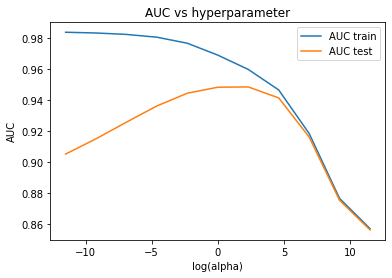

optimal alpha for which auc is maximum :  10


In [115]:
# Please write all the code with proper documentation
from sklearn.feature_extraction.text import TfidfTransformer,CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
import math
count_vect=CountVectorizer()
final_Xtr=count_vect.fit_transform(X_train)
final_Xte=count_vect.transform(X_test)

# Positive=1,negative=0

auc_train=[]
auc_test=[]
alpha_values = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]#alpha from 10^-5 to 10^5
    
for i in alpha_values:
    mnb = MultinomialNB(alpha = i)
    mnb.fit(final_Xtr,y_tr)
    pred=mnb.predict_proba(final_Xte)[:,1]
    pred1=mnb.predict_proba(final_Xtr)[:,1]
    auc_train.append(roc_auc_score(y_tr,pred1))
    auc_test.append(roc_auc_score(y_te,pred))
    
optimal_alpha= alpha_values[auc_test.index(max(auc_test))]
alpha_values=[math.log(x) for x in alpha_values]
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(alpha_values, auc_train, label='AUC train')
ax.plot(alpha_values, auc_test, label='AUC test')
plt.title('AUC vs hyperparameter')
plt.xlabel('log(alpha)')
plt.ylabel('AUC')
ax.legend()
plt.show()
print('optimal alpha for which auc is maximum : ',optimal_alpha)


In [81]:
# loading the pickle file
file = open('C:\\Users\\Subramanyam\\Desktop\\ML DATASETS\\amazon-fine-food-reviews\\Sentient_Model_NB_TFIDF.clf','rb')
model = pickle.load(file)
print("loading the model")

loading the model


A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a 

binary classifier system as its discrimination threshold is varied. The ROC curve is created by plotting the true positive rate

against the false positive rate at various threshold settings. 

From ROC Curve, we can say that how much accurately our model distinguishes or discriminates oe classifies the data,

i.e 1 as 1 and 0 as 0

AUC Score needs to br near 1 

simply,

if AUC = 1 (1 as 1 and 0 as 0)
if AUC = 0.5 (no discrimination)
if AUC = 0 (1 as 0) and 0 as 1

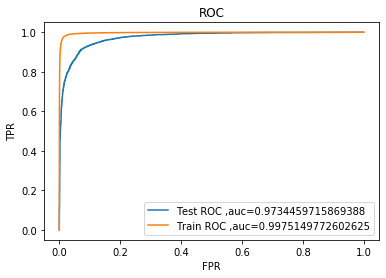

In [83]:
#ROC for alpha =1
predi=model.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, predi)
pred=model.predict_proba(X_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,predi)))
ax.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
ax.legend()
plt.show()

# Scores

Using Bag of words for vectorising the data & Multii_NavieBayes algoritm for training on data

Train:

Accuracy Score :0.98185

    Confusion_Matrix :
 
[[19658   374]
 
 [  352 19616]]

classification_report :

    precision    recall  f1-score   support

    Negative       0.98      0.98      0.98     20032
    
    Positive       0.98      0.98      0.98     19968

    
Test:
    
Accuracy Score : 0.9187
    
Confusion_Matrix :
 
[[4603  426]

 [ 387 4584]]

classification_report :

    precision    recall  f1-score   support

    Negative       0.92      0.92      0.92      5029
    
    Positive       0.91      0.92      0.92      4971


Using Term Frequency and Inverse Document Frequency  for vectorising the data & Multii_NavieBayes algoritm for training on data

Train:

Accuracy Score : 0.9887

Confusion_Matrix :

    [[4603  426]
 
     [ 387 4584]]

classification_report :

    precision    recall  f1-score   support

    Negative       0.92      0.92      0.92      5029
    
    Positive       0.91      0.92      0.92      4971

    
    
Test:
    
Accuracy Score : 0.92187
Confusion_Matrix :
 
[[4603  426]

 [ 387 4584]]

classification_report :

    precision    recall  f1-score   support

    Negative       0.92      0.92      0.92      5029
    
    Positive       0.91      0.92      0.92      4971

# Techniques to improve the accuracy & classification report

1 ) Stemming the data using port stemmer and using Snowball stemmer & Adding stopwords

2 ) Using Different ML  & Ensemble methods

3 ) Using Deep Neural_Networks (I.e  LSTM)

4 ) Adding weightage for emoticons